In [1]:
%pip install stability-sdk

  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.14.0
    Uninstalling protobuf-3.14.0:
      Successfully uninstalled protobuf-3.14.0
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.51.1
    Uninstalling grpcio-1.51.1:
      Successfully uninstalled grpcio-1.51.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
import getpass, os

# NB: host url is not prepended with \"https\" nor does it have a trailing slash.
os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'

# To get your API key, visit https://beta.dreamstudio.ai/membership
os.environ['STABILITY_KEY'] = getpass.getpass('Enter your API Key')

Enter your API Key········


In [2]:
import io
import os
import warnings

from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation


stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], 
    verbose=True,
)

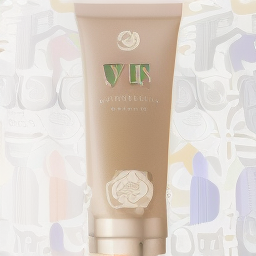

In [11]:
# the object returned is a python generator
from PIL import Image
image = Image.open('C:\\Users\\88697\\Desktop\\照片\\寶貝\\想買的化妝品_201122_9.jpg')
answers = stability_api.generate(
    prompt="a lotion in the middle ,in front of rose in the background",
    init_image=image.resize((256,256)),
    seed=12345, # if provided, specifying a random seed makes results deterministic
    steps=30, # defaults to 30 if not specified
    start_schedule=0.6,
)
# C:\Users\88697\Desktop\照片\寶貝\想買的化妝品_201122_9.jpg
# iterating over the generator produces the api response
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img = Image.open(io.BytesIO(artifact.binary))
            display(img)

In [28]:
import cv2
from PIL import Image
image = Image.open('C:\\Users\\88697\\Desktop\\照片\\105APPLE\\BKVS7987.JPG')
print(image.resize((256,256)))

<PIL.Image.Image image mode=RGB size=256x256 at 0x17E64D266D0>
